# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable

apiKey = os.getenv("NEWS_API_KEY")
type(apiKey)

str

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(apiKey)

In [8]:
# Fetch the Bitcoin news articles

bitcoin_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100)

In [9]:
# Fetch the Ethereum news articles

ethereum_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100)

In [10]:
bitcoin_articles["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Paul Ford',
 'title': 'A Field Guide for Nature-Resistant Nerds',
 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
 'publishedAt': '2021-08-06T11:00:00Z',
 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

In [11]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

In [13]:
# Print out the max scores for BTC

print(f"max positive score for bitcoin: {bitcoin_df.positive.max()}")
print(f"max negative score for bitcoin: {bitcoin_df.negative.max()}")
print(f"max compound score for bitcoin: {bitcoin_df.compound.max()}")

max positive score for bitcoin: 0.274
max negative score for bitcoin: 0.312
max compound score for bitcoin: 0.8834


In [14]:
# Create the Ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

In [15]:
# Print out the max scores for ETH

print(f"max positive score for ethereum: {ethereum_df.positive.max()}")
print(f"max negative score for ethereum: {ethereum_df.negative.max()}")
print(f"max compound score for ethereum: {ethereum_df.compound.max()}")

max positive score for ethereum: 0.201
max negative score for ethereum: 0.312
max compound score for ethereum: 0.7506


In [16]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.065570,0.054740,0.037200,0.908080
std,0.372023,0.061742,0.060295,0.079383
min,-0.893400,0.000000,0.000000,0.688000
25%,-0.083575,0.000000,0.000000,0.865750
50%,0.000000,0.052000,0.000000,0.921000
75%,0.340000,0.088250,0.070250,1.000000
max,0.883400,0.274000,0.312000,1.000000


In [17]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.076982,0.050340,0.029370,0.920280
std,0.367687,0.058021,0.054428,0.071747
min,-0.893400,0.000000,0.000000,0.688000
25%,-0.045025,0.000000,0.000000,0.886750
50%,0.000000,0.046500,0.000000,0.926000
75%,0.340000,0.080000,0.052250,1.000000
max,0.750600,0.201000,0.312000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC had the highest mean positive score

Q: Which coin had the highest compound score?

A: BTC had the highest compound score

Q. Which coin had the highest positive score?

A: BTC had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw_list = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
     # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_addons = {'Chars','another','said', 'sent', 'found', 'including', 'today', 
                 'announced', 'week', 'basically','reuters','reutersdado','also', 
                 'illustration', 'ha', 'seem', 'reported','taken'}
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
   
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [22]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedlegetty, images, twitter, squ..."
3,2021-08-19,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.000,0.847,"[retailers, increasingly, accepting, cryptocur..."
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


In [23]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
1,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, wa, founded, adfree, creator, network, ..."
2,2021-08-23,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.000,0.902,"[paypal, allow, user, outside, us, buy, hold, ..."
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861,"[bell, coinbase, period, impressive, result, s..."
4,2021-08-23,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.000,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [26]:
# Generate the Bitcoin N-grams where N=2
bitcoin_string = bitcoin_df.text.str.cat()
bitcoin_token = tokenizer(bitcoin_string)
bitcoin_bigram = Counter(ngrams(tokenizer(bitcoin_string), n = 2))
bitcoin_bigram.most_common(10)

[(('charsaugust', 'min'), 12),
 (('min', 'readthis'), 6),
 (('story', 'originally'), 6),
 (('originally', 'appeared'), 6),
 (('expressed', 'entrepreneur'), 6),
 (('entrepreneur', 'contributor'), 6),
 (('first', 'time'), 5),
 (('cryptocurrency', 'bitcoin'), 5),
 (('article', 'wa'), 5),
 (('wa', 'translated'), 5)]

In [27]:
# Generate the Ethereum N-grams where N=2
ethereum_string = ethereum_df.text.str.cat()
ethereum_token = tokenizer(ethereum_string)
ethereum_bigram = Counter(ngrams(tokenizer(ethereum_string), n = 2))
ethereum_bigram.most_common(10)

[(('york', 'aug'), 8),
 (('poly', 'network'), 8),
 (('pc', 'motherboard'), 7),
 (('placed', 'pc'), 6),
 (('motherboard', 'june'), 6),
 (('cryptocurrency', 'heist'), 6),
 (('us', 'dollar'), 6),
 (('aug', 'dollar'), 6),
 (('kong', 'aug'), 5),
 (('charsrepresentations', 'cryptocurrencies'), 5)]

In [28]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_token, N = 10)

[('bitcoin', 34),
 ('cryptocurrency', 27),
 ('wa', 15),
 ('monday', 14),
 ('company', 13),
 ('charsaugust', 12),
 ('min', 12),
 ('us', 9),
 ('first', 9),
 ('new', 9)]

In [30]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_token, N = 10)

[('cryptocurrency', 31),
 ('ethereum', 26),
 ('aug', 22),
 ('bitcoin', 22),
 ('us', 16),
 ('dollar', 16),
 ('network', 13),
 ('million', 13),
 ('wa', 11),
 ('thursday', 11)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

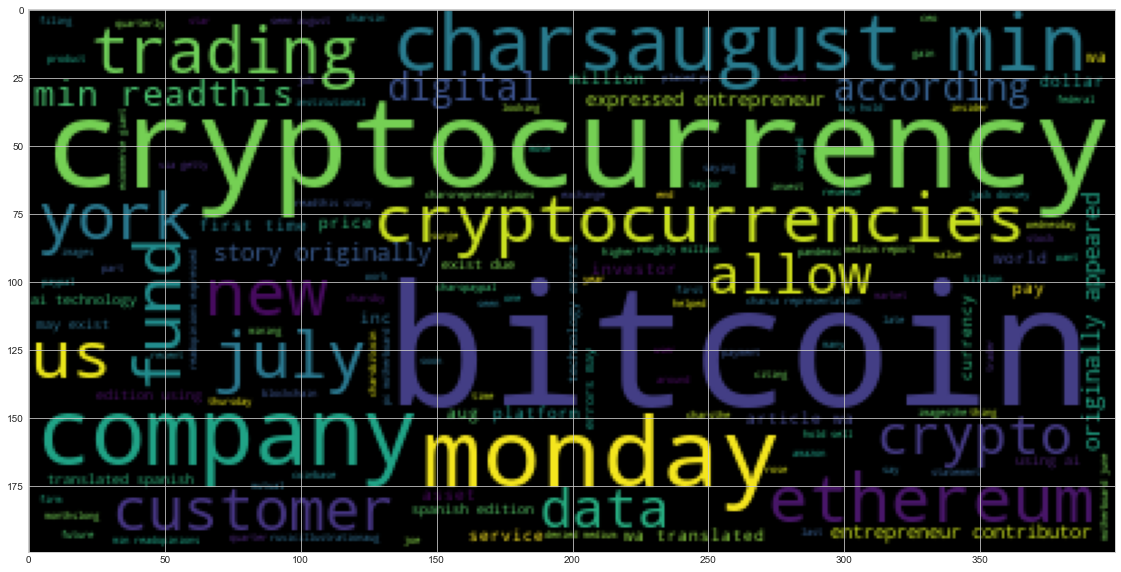

In [33]:
# Generate the Bitcoin word cloud
bitcoin_cloud = ' '.join(bitcoin_token)
wc = WordCloud().generate(bitcoin_cloud)
plt.imshow(wc)

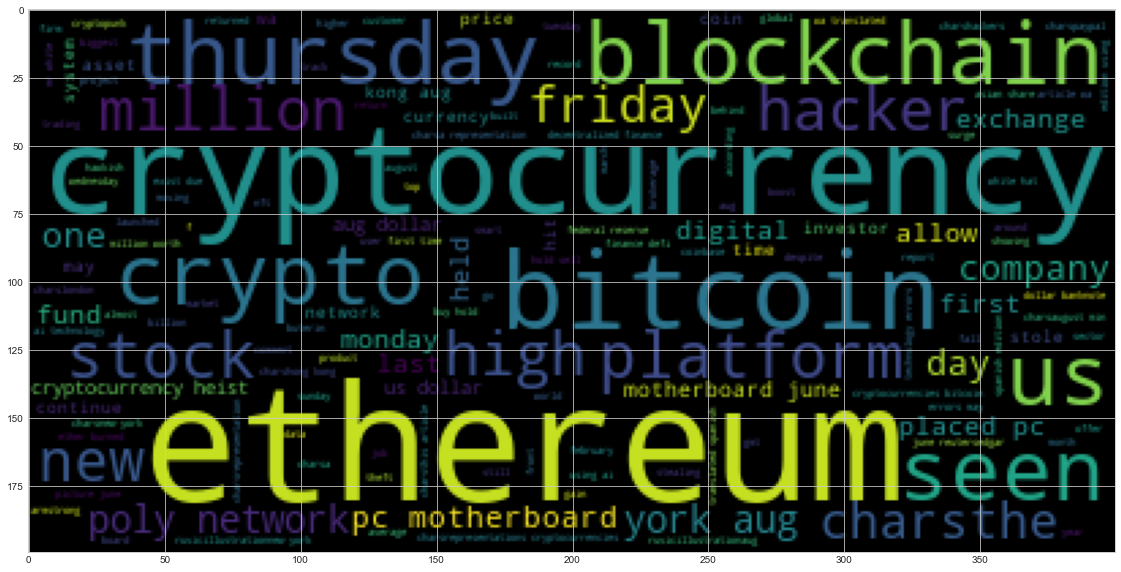

In [34]:
# Generate the Ethereum word cloud
ethereum_cloud = ' '.join(ethereum_token)
wc = WordCloud().generate(ethereum_cloud)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [35]:
import spacy
from spacy import displacy

In [36]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [38]:
# Concatenate all of the Bitcoin text together
bitcoin_string[:100]

'When my wife started a little garden in our urban backyard, all I could think about were the worms. '

In [39]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_string)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin"

In [41]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [42]:
# List all Entities
print([ent.text for ent in bitcoin_doc.ents])

['U.S.', 'first', 'today', 'U.K.', 'Joe Raedle/', 'Twitter', 'Square', 'Jack Dorsey', 'Monday', 'a year', 'US', 'Joe TidyCyber', 'every day', '3 p.m. PDT', 'Daily Crunch', 'July 23, 2021', 'today', 'Coinbase', 'its second quarter', 'the quarter', 'Coinbase', '$2.23 billion', 'chars]T-Mobile', 'two years', 'roughly 49 million', 'UK', 'first', 'four', 'July 28', 'Reuters', '40,000', 'Wednesday', 'Motherboard', 'first', '$311 billion', 'Q2 2021', 'Insider Intellige', 'August 6, 2021', 'REUTERS', 'Dado Ruvic/IllustrationAug', '20', 'Reuters', '5.01 %', '49,106.4', '22:04 GMT', 'Friday', '20, 2021', 'PennyStocksBitcoin Price Surge Helped Boost', 'Bitcoin, Dogecoin', 'Ethereum', 'T-Mobile', 'Roughly 47.8 million', 'June 7, 2021', 'REUTERS', 'Edgar Su/IllustrationAug', 'Reuters', '7.07%', '47,587.38', '2200', 'Dado Ruvic/Illustration\r\nWelcome', '10', 'the Opening Bell', 'first', '24, 2021', 'Entrepreneur', 'El Salvador’s', 'Bitcoin\xa0', '23', 'Reuters', '50,000', 'Monday', 'first', 'May', 

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_string[:100]

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---